# Atividade 03
---

## Sumário

- Carregando os Dados com MNE-Python:

Use mne.io.read_raw_edf() para carregar os arquivos .edf.
- Visualização:

Com MNE, você pode usar métodos como raw.plot() para visualizar os dados EEG ao longo do tempo.
mne.viz.plot_topomap() permite visualizar a distribuição espacial da atividade cerebral.

- Filtragem:

Use o método raw.filter() do MNE para filtrar o sinal EEG em bandas de frequência específicas (alpha, beta, etc.).
- Transformada de Fourier:

Utilize a função scipy.signal.welch() para obter a densidade espectral de potência e visualizar as frequências dominantes no sinal.

- Análise no Domínio do Tempo:

Use funções como scipy.signal.find_peaks() para identificar picos no sinal e analisar a atividade cerebral em diferentes pontos no tempo.

- Análise Estatística:

Use métodos estatísticos para comparar a atividade cerebral entre diferentes grupos (por exemplo, controles vs. pacientes com insônia).

 - Analise Espectral

 - DFT para achar h, w e plotar

 - Maximos e minimos relativos e Picos

 - Energia (Parseval) com wavelet e niveis de db6

 - Random Forest para classificar [insonia, bruxismo, tdah]

### Analise

In [21]:
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import mne
import pandas as pd
import os





class AnaliseSinaisESistemas:

    def __init__(self) -> None:
        self._sinal = []
        self.timer = 0
        self.taxa_amostragem = ''
        self.frequency = ''

    def carregar_sinal(self, par=0):
        data, timer = hp.load_exampledata(par)
        return data, timer

    def visualizationSignal(self, _data, titulo):
        plt.figure(figsize=(12, 4))
        plt.plot(_data)
        plt.title(titulo)
        plt.show()

    def gerarSinalExemplo(self):
        # Criar um sinal de exemplo
        t = np.linspace(0, 1, 1000, endpoint=False)
        signal_freq = 5  # Frequência do sinal
        signal_amplitude = 1
        signal_waveform = signal_amplitude * \
            np.sin(2 * np.pi * signal_freq * t)

        return signal_waveform

    def filtragem_fir(self, signal_waveform):
        t = np.linspace(0, 1, 1000, endpoint=False)

        # Criar um filtro FIR passa-baixa
        cutoff_freq = 10  # Frequência de corte
        num_taps = 30
        fir_filter = scipy.signal.firwin(num_taps, cutoff_freq / (0.5 * 1000))

        # Aplicar o filtro ao sinal
        filtered_signal = scipy.signal.lfilter(
            fir_filter, 1.0, signal_waveform)

        # Plotar o sinal original e o sinal filtrado
        plt.plot(t, signal_waveform, label='Sinal Original')
        plt.plot(t, filtered_signal, label='Sinal Filtrado')
        plt.legend()
        plt.show()

    def resposta_frequencia_fir(self):
        # Parâmetros do filtro FIR
        num_taps = 64
        cutoff_freq = 0.1

        # Projeto da janela do filtro
        fir_coefficients = scipy.signal.firwin(num_taps, cutoff_freq)

        # Resposta em frequência do filtro
        w, h = scipy.signal.freqz(fir_coefficients)

        # Plotar a resposta em frequência
        plt.plot(w, abs(h))
        plt.title("Resposta em Frequência do Filtro FIR")
        plt.xlabel("Frequência normalizada")
        plt.ylabel("Magnitude")
        plt.grid()
        plt.show()

    def espectro_frequencia(self, signal_waveform):

        # Calcular a transformada de Fourier
        signal_spectrum = scipy.signal.fftconvolve(signal_waveform)

        # Plotar o espectro de frequência
        plt.plot(np.abs(signal_spectrum))
        plt.show()

    def janela(self):
        # Escolher uma janela (por exemplo, janela de Hamming)
        window = scipy.signal.get_window('hamming', 64)

        # Plotar a janela
        plt.plot(window)
        plt.title('Janela de Hamming')
        plt.xlabel('Amostra')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.show()

    def resposta_frequencia(self):
        # Parâmetros do filtro
        b = [0.1, 0.2, 0.3, 0.4, 0.5]
        a = [1, -0.5, 0.25, -0.125, 0.0625]

        # Calcular a resposta em frequência
        w, h = scipy.signal.freqz(b, a)

        # Plotar a resposta em frequência
        plt.plot(w, 20 * np.log10(abs(h)))
        plt.title('Resposta em Frequência')
        plt.xlabel('Frequência [radianos / amostra]')
        plt.ylabel('Ganho [dB]')
        plt.grid()
        plt.show()

    def convolucao(self, x, h):
        # Realizar a convolução
        y = scipy.signal.convolve(x, h, mode='full')

        # Plotar os sinais e o resultado da convolução
        plt.stem(x, basefmt=" ", linefmt="b-", markerfmt="bo", label='x[n]')
        plt.stem(h, linefmt="g-", markerfmt="go", label='h[n]')
        plt.stem(y, linefmt="r-", markerfmt="ro", label='x[n] * h[n]')
        plt.legend()
        plt.show()

    def calculaCoherence(self, _data1, _data2, taxa_amostragem):
        frequencies, coh = scipy.signal.coherence(
            _data1, _data2, fs=taxa_amostragem)
        return frequencies, coh

    def calculaFFT(self, _data, taxa_amostragem):
        fft_result = np.fft.fft(_data)
        fft_freq = np.fft.fftfreq(len(_data), 1 / taxa_amostragem)
        return fft_freq, fft_result

    def gerarGrafico(self, matriz, titulo, labels=[]):
        plt.figure(figsize=(12, 4))
        plt.plot(matriz)
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.title(titulo)
        plt.show()

    def calculaPeriodograma(self, data):
        frequencies, Pxx_density = scipy.signal.periodogram(data, fs=100)
        plt.semilogy(frequencies, Pxx_density)
        plt.title('Periodograma')
        plt.xlabel('Frequencia [Hz]')
        plt.ylabel('PSD')
        plt.show()

    def calculaWelchMethod(self, data):
        frequencies, Pxx_den = scipy.signal.welch(data, fs=100)
        plt.semilogy(frequencies, Pxx_den)
        plt.title('Welch’s Method')
        plt.xlabel('Frequencia [Hz]')
        plt.ylabel('PSD')
        plt.show()

    #!Funções de manipulações de arquivos
    def localizar_arquivos_txt(self, diretorio):
        """Retorna uma lista de arquivos .txt no diretório especificado."""
        return [f for f in os.listdir(diretorio) if os.path.isfile(os.path.join(diretorio, f)) and f.endswith('.txt')]

    def localizar_arquivos_edf(self, diretorio):
        """Retorna uma lista de arquivos .edf no diretório especificado."""
        return [f for f in os.listdir(diretorio) if os.path.isfile(os.path.join(diretorio, f)) and f.endswith('.edf')]

    #! Processamento de Sinais
    def carregarSinalEDF(self, files):
        raw = mne.io.read_raw_edf(files, preload=True)
        print('\nArquivo: ', raw.info)
        print('\nInfo:', files)
        print('\nCanais presentes no sinal: ', raw.info.ch_names)
        raw.plot()

    #! Analise Exploratória
    # Função para ler e exibir o conteúdo de um arquivo de texto (.txt)
    def ler_e_exibir_arquivo_txt(self,nome_arquivo):
        try:
            with open(nome_arquivo, 'r') as arquivo:
                conteudo = arquivo.read()
                print("Conteúdo do arquivo:")
                print(conteudo)
        except FileNotFoundError:
            print(f"O arquivo '{nome_arquivo}' não foi encontrado.")

    # Função para ler um arquivo .txt e gerar um DataFrame
    def ler_arquivo_txt_para_dataframe(self,nome_arquivo, separador='\s+', linha_inicial=22):
        try:

            #ler o arquivo csv
            df = pd.read_csv(nome_arquivo, sep=separador, skiprows=linha_inicial, engine='python')

            # processando
            #df = self.processarTxtDataframe(dataframe)

            isSafe = False

            # Remova a coluna 'Position' do DataFrame
            try:
                df.drop('Position', axis=1, inplace=True)
                df.drop('Stage', axis=1, inplace=True)
                df.drop('Location', axis=1, inplace=True)
                isSafe = True
            except:
                print('falha')

            if (isSafe):
                # Renomear colunas
                novo_nome_colunas = {
                    'Sleep': 'Estágio de Sono',
                    'Time': 'Tempo',
                    '[hh:mm:ss]': 'Evento',
                    'Event': 'Duração',
                    'Duration[s]': 'Localização'
                }

                # Suponha que você tenha um DataFrame chamado 'dataframe' e que deseja remover a coluna 'ColunaParaRemover'.
                df.rename(columns=novo_nome_colunas, inplace=True)


            return df



        except FileNotFoundError:
            print(f"O arquivo '{nome_arquivo}' não foi encontrado.")
        except pd.errors.EmptyDataError:
            print(f"O arquivo '{nome_arquivo}' está vazio ou não contém dados.")
        except pd.errors.ParserError:
            print(f"Erro ao analisar o arquivo '{nome_arquivo}'. Verifique o separador.")



    # Função para ler uma linha específica do arquivo de texto
    def ler_txt_linha(self,nome_arquivo, numero_linha):
        try:
            with open(nome_arquivo, 'r') as arquivo:
                linhas = arquivo.readlines()
                if 1 <= numero_linha <= len(linhas):
                    linha = linhas[numero_linha - 1]  # -1 para ajustar para índice base 0
                    return linha.strip()  # Remove espaços em branco no início e no final da linha
                else:
                    return None  # Retorna None se o número da linha estiver fora do alcance
        except FileNotFoundError:
            print(f"O arquivo '{nome_arquivo}' não foi encontrado.")
        except IndexError:
            print("Número de linha inválido.")



    # Função para ler várias linhas com base em uma lista de números de linha
    def ler_varias_linhas(self,nome_arquivo, numeros_linhas):
        linhas_lidas = {}
        try:
            with open(nome_arquivo, 'r') as arquivo:
                linhas = arquivo.readlines()
                for numero_linha in numeros_linhas:
                    if 1 <= numero_linha <= len(linhas):
                        linha = linhas[numero_linha - 1]  # -1 para ajustar para índice base 0
                        linhas_lidas[numero_linha] = linha.strip()
                    else:
                        linhas_lidas[numero_linha] = None  # None para linhas fora do alcance
                return linhas_lidas
        except FileNotFoundError:
            print(f"O arquivo '{nome_arquivo}' não foi encontrado.")
            return {}
        except IndexError:
            print("Número de linha inválido.")
            return {}


        # Função para plotar um gráfico a partir de duas colunas do DataFrame
    def plotar_grafico(self,dataframe, coluna_x, coluna_y, titulo):
        plt.figure(figsize=(10, 6))
        plt.plot(dataframe[coluna_x], dataframe[coluna_y])
        plt.xlabel(coluna_x)
        plt.ylabel(coluna_y)
        plt.title(titulo)
        plt.grid(True)
        plt.show()





analise = AnaliseSinaisESistemas()


import mne
from scipy.signal import welch, find_peaks, argrelmax, argrelmin
import pywt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



def analisar_espectro(sinal, sfreq):
    """
    Analisa o espectro de frequência de um sinal usando a DFT.

    Parâmetros:
    - sinal: O sinal no domínio do tempo (array numpy).
    - sfreq: Frequência de amostragem do sinal em Hz.

    Retorna:
    - frequencias: Array de frequências correspondentes ao espectro.
    - espectro: Array de amplitudes do espectro de frequência.
    """
    # Calcula a DFT do sinal
    n = len(sinal)
    espectro = np.fft.fft(sinal)

    # Calcula as frequências correspondentes
    frequencias = np.fft.fftfreq(n, d=1/sfreq)

    # Retorna as frequências e o espectro
    return frequencias, espectro


# Função para carregar dados EEG a partir de um arquivo .edf
def carregar_dados_edf(nome_arquivo):
    return mne.io.read_raw_edf(nome_arquivo, preload=True)

def cout(p):
    print('\n\n=================================================')
    print(p)
    print('=================================================')

# Função para visualizar os dados EEG ao longo do tempo
def visualizar_dados_tempo(raw):
    raw.plot()

# Função para visualizar a distribuição espacial da atividade cerebral
def visualizar_distribuicao_espacial(raw):
    raw.plot_sensors(kind='topomap', show_names=True)

# Função para filtrar o sinal EEG em uma banda de frequência específica
def filtrar_sinal(raw, frequencia_min, frequencia_max):
    filtred = raw.filter(frequencia_min, frequencia_max, fir_design='firwin')
    return filtred

# Função para calcular a densidade espectral de potência
def calcular_densidade_espectral(raw):
    frequencies, psd = welch(raw.get_data(), fs=raw.info['sfreq'])
    return frequencies, psd

# Função para identificar picos no sinal EEG
def identificar_picos(raw):
    peaks, _ = find_peaks(raw.get_data()[0])  # Substitua 0 pelo canal desejado
    return peaks

# Função para calcular a Transformada de Fourier Discreta (DFT)
def calcular_dft(raw):
    sinal = raw.get_data()[0]  # Substitua 0 pelo canal desejado
    h = np.fft.fft(sinal)
    n = len(sinal)
    w = 2 * np.pi * np.fft.fftfreq(n, d=1/raw.info['sfreq'])
    return h, w

# Função para calcular a energia em cada nível de decomposição wavelet
def calcular_energia_wavelet(sinal, nivel=6, wavelet='db6'):
    coeffs = pywt.wavedec(sinal, wavelet, level=nivel)
    energias = [np.sum(np.abs(c) ** 2) for c in coeffs[:-1]]  # Excluir o último nível
    niveis_plot = range(1, nivel + 1)
    return niveis_plot, energias

# Função para treinar um modelo Random Forest e avaliá-lo
def treinar_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def plotar_sinal(x,y,titulo):
    # Plote o espectro de frequência
    plt.figure(figsize=(12, 4))
    plt.plot(x, y)
    plt.title(titulo)
    plt.xlabel(f'Eixo X ')
    plt.ylabel(f'Eixo Y ')
    plt.grid(True)
    plt.show()

def cout(msg):
    print('\n\n=====================================================================')
    print(msg)
    print('=====================================================================')




In [22]:
from Class.AnaliseSistaisSistemas import AnaliseSinaisESistemas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import mne
import pandas as pd




analise = AnaliseSinaisESistemas()


import mne
from scipy.signal import welch, find_peaks, argrelmax, argrelmin
import pywt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



def analisar_espectro(sinal, sfreq):
    """
    Analisa o espectro de frequência de um sinal usando a DFT.
    
    Parâmetros:
    - sinal: O sinal no domínio do tempo (array numpy).
    - sfreq: Frequência de amostragem do sinal em Hz.
    
    Retorna:
    - frequencias: Array de frequências correspondentes ao espectro.
    - espectro: Array de amplitudes do espectro de frequência.
    """
    # Calcula a DFT do sinal
    n = len(sinal)
    espectro = np.fft.fft(sinal)
    
    # Calcula as frequências correspondentes
    frequencias = np.fft.fftfreq(n, d=1/sfreq)
    
    # Retorna as frequências e o espectro
    return frequencias, espectro


# Função para carregar dados EEG a partir de um arquivo .edf
def carregar_dados_edf(nome_arquivo):
    return mne.io.read_raw_edf(nome_arquivo, preload=True)

def cout(p):
    print('\n\n=================================================')
    print(p)
    print('=================================================')

# Função para visualizar os dados EEG ao longo do tempo
def visualizar_dados_tempo(raw):
    raw.plot()

# Função para visualizar a distribuição espacial da atividade cerebral
def visualizar_distribuicao_espacial(raw):
    raw.plot_sensors(kind='topomap', show_names=True)

# Função para filtrar o sinal EEG em uma banda de frequência específica
def filtrar_sinal(raw, frequencia_min, frequencia_max):
    return raw.filter(frequencia_min, frequencia_max, fir_design='firwin')

# Função para calcular a densidade espectral de potência
def calcular_densidade_espectral(raw):
    frequencies, psd = welch(raw.get_data(), fs=raw.info['sfreq'])
    return frequencies, psd

# Função para identificar picos no sinal EEG
def identificar_picos(raw):
    peaks, _ = find_peaks(raw.get_data()[0])  # Substitua 0 pelo canal desejado
    return peaks

# Função para calcular a Transformada de Fourier Discreta (DFT)
def calcular_dft(raw):
    sinal = raw.get_data()[0]  # Substitua 0 pelo canal desejado
    h = np.fft.fft(sinal)
    n = len(sinal)
    w = 2 * np.pi * np.fft.fftfreq(n, d=1/raw.info['sfreq'])
    return h, w

# Função para calcular a energia em cada nível de decomposição wavelet
def calcular_energia_wavelet(sinal, nivel=6, wavelet='db6'):
    coeffs = pywt.wavedec(sinal, wavelet, level=nivel)
    energias = [np.sum(np.abs(c) ** 2) for c in coeffs[:-1]]  # Excluir o último nível
    niveis_plot = range(1, nivel + 1)
    return niveis_plot, energias

# Função para treinar um modelo Random Forest e avaliá-lo
def treinar_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def plotar_sinal(x,y,titulo):
    # Plote o espectro de frequência
    plt.figure(figsize=(12, 4))
    plt.plot(x, y)
    plt.title(titulo)
    plt.xlabel(f'Eixo X ')
    plt.ylabel(f'Eixo Y ')
    plt.grid(True)
    plt.show()




In [23]:
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import mne
import pandas as pd
import os


class AnaliseSinaisESistemas:

    def __init__(self) -> None:
        self._sinal = []
        self.timer = 0
        self.taxa_amostragem = ''
        self.frequency = ''

    def carregar_sinal(self, par=0):
        data, timer = hp.load_exampledata(par)
        return data, timer

    def visualizationSignal(self, _data, titulo):
        plt.figure(figsize=(12, 4))
        plt.plot(_data)
        plt.title(titulo)
        plt.show()

    def gerarSinalExemplo(self):
        # Criar um sinal de exemplo
        t = np.linspace(0, 1, 1000, endpoint=False)
        signal_freq = 5  # Frequência do sinal
        signal_amplitude = 1
        signal_waveform = signal_amplitude * \
            np.sin(2 * np.pi * signal_freq * t)

        return signal_waveform

    def filtragem_fir(self, signal_waveform):
        t = np.linspace(0, 1, 1000, endpoint=False)

        # Criar um filtro FIR passa-baixa
        cutoff_freq = 10  # Frequência de corte
        num_taps = 30
        fir_filter = scipy.signal.firwin(num_taps, cutoff_freq / (0.5 * 1000))

        # Aplicar o filtro ao sinal
        filtered_signal = scipy.signal.lfilter(
            fir_filter, 1.0, signal_waveform)

        # Plotar o sinal original e o sinal filtrado
        plt.plot(t, signal_waveform, label='Sinal Original')
        plt.plot(t, filtered_signal, label='Sinal Filtrado')
        plt.legend()
        plt.show()

    def resposta_frequencia_fir(self):
        # Parâmetros do filtro FIR
        num_taps = 64
        cutoff_freq = 0.1

        # Projeto da janela do filtro
        fir_coefficients = scipy.signal.firwin(num_taps, cutoff_freq)

        # Resposta em frequência do filtro
        w, h = scipy.signal.freqz(fir_coefficients)

        # Plotar a resposta em frequência
        plt.plot(w, abs(h))
        plt.title("Resposta em Frequência do Filtro FIR")
        plt.xlabel("Frequência normalizada")
        plt.ylabel("Magnitude")
        plt.grid()
        plt.show()

    def espectro_frequencia(self, signal_waveform):

        # Calcular a transformada de Fourier
        signal_spectrum = scipy.signal.fftconvolve(signal_waveform)

        # Plotar o espectro de frequência
        plt.plot(np.abs(signal_spectrum))
        plt.show()

    def janela(self):
        # Escolher uma janela (por exemplo, janela de Hamming)
        window = scipy.signal.get_window('hamming', 64)

        # Plotar a janela
        plt.plot(window)
        plt.title('Janela de Hamming')
        plt.xlabel('Amostra')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.show()

    def resposta_frequencia(self):
        # Parâmetros do filtro
        b = [0.1, 0.2, 0.3, 0.4, 0.5]
        a = [1, -0.5, 0.25, -0.125, 0.0625]

        # Calcular a resposta em frequência
        w, h = scipy.signal.freqz(b, a)

        # Plotar a resposta em frequência
        plt.plot(w, 20 * np.log10(abs(h)))
        plt.title('Resposta em Frequência')
        plt.xlabel('Frequência [radianos / amostra]')
        plt.ylabel('Ganho [dB]')
        plt.grid()
        plt.show()

    def convolucao(self, x, h):
        # Realizar a convolução
        y = scipy.signal.convolve(x, h, mode='full')

        # Plotar os sinais e o resultado da convolução
        plt.stem(x, basefmt=" ", linefmt="b-", markerfmt="bo", label='x[n]')
        plt.stem(h, linefmt="g-", markerfmt="go", label='h[n]')
        plt.stem(y, linefmt="r-", markerfmt="ro", label='x[n] * h[n]')
        plt.legend()
        plt.show()

    def calculaCoherence(self, _data1, _data2, taxa_amostragem):
        frequencies, coh = scipy.signal.coherence(
            _data1, _data2, fs=taxa_amostragem)
        return frequencies, coh

    def calculaFFT(self, _data, taxa_amostragem):
        fft_result = np.fft.fft(_data)
        fft_freq = np.fft.fftfreq(len(_data), 1 / taxa_amostragem)
        return fft_freq, fft_result

    def gerarGrafico(self, matriz, titulo, labels=[]):
        plt.figure(figsize=(12, 4))
        plt.plot(matriz)
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.title(titulo)
        plt.show()

    def calculaPeriodograma(self, data):
        frequencies, Pxx_density = scipy.signal.periodogram(data, fs=100)
        plt.semilogy(frequencies, Pxx_density)
        plt.title('Periodograma')
        plt.xlabel('Frequencia [Hz]')
        plt.ylabel('PSD')
        plt.show()

    def calculaWelchMethod(self, data):
        frequencies, Pxx_den = scipy.signal.welch(data, fs=100)
        plt.semilogy(frequencies, Pxx_den)
        plt.title('Welch’s Method')
        plt.xlabel('Frequencia [Hz]')
        plt.ylabel('PSD')
        plt.show()

    #!Funções de manipulações de arquivos
    def localizar_arquivos_txt(self, diretorio):
        """Retorna uma lista de arquivos .txt no diretório especificado."""
        return [f for f in os.listdir(diretorio) if os.path.isfile(os.path.join(diretorio, f)) and f.endswith('.txt')]

    def localizar_arquivos_edf(self, diretorio):
        """Retorna uma lista de arquivos .edf no diretório especificado."""
        return [f for f in os.listdir(diretorio) if os.path.isfile(os.path.join(diretorio, f)) and f.endswith('.edf')]

    #! Processamento de Sinais
    def carregarSinalEDF(self, files):
        raw = mne.io.read_raw_edf(files, preload=True)
        print('\nArquivo: ', raw.info)
        print('\nInfo:', files)
        print('\nCanais presentes no sinal: ', raw.info.ch_names)
        raw.plot()

    #! Analise Exploratória
    # Função para ler e exibir o conteúdo de um arquivo de texto (.txt)
    def ler_e_exibir_arquivo_txt(self,nome_arquivo):
        try:
            with open(nome_arquivo, 'r') as arquivo:
                conteudo = arquivo.read()
                print("Conteúdo do arquivo:")
                print(conteudo)
        except FileNotFoundError:
            print(f"O arquivo '{nome_arquivo}' não foi encontrado.")

    # Função para ler um arquivo .txt e gerar um DataFrame
    def ler_arquivo_txt_para_dataframe(self,nome_arquivo, separador='\s+', linha_inicial=22):
        try:

            #ler o arquivo csv
            df = pd.read_csv(nome_arquivo, sep=separador, skiprows=linha_inicial, engine='python')

            # processando
            #df = self.processarTxtDataframe(dataframe)

            isSafe = False

            # Remova a coluna 'Position' do DataFrame
            try:
                df.drop('Position', axis=1, inplace=True)
                df.drop('Stage', axis=1, inplace=True)
                df.drop('Location', axis=1, inplace=True)
                isSafe = True
            except:
                print('falha')

            if (isSafe):
                # Renomear colunas
                novo_nome_colunas = {
                    'Sleep': 'Estágio de Sono',
                    'Time': 'Tempo',
                    '[hh:mm:ss]': 'Evento',
                    'Event': 'Duração',
                    'Duration[s]': 'Localização'
                }

                # Suponha que você tenha um DataFrame chamado 'dataframe' e que deseja remover a coluna 'ColunaParaRemover'.
                df.rename(columns=novo_nome_colunas, inplace=True)


            return df



        except FileNotFoundError:
            print(f"O arquivo '{nome_arquivo}' não foi encontrado.")
        except pd.errors.EmptyDataError:
            print(f"O arquivo '{nome_arquivo}' está vazio ou não contém dados.")
        except pd.errors.ParserError:
            print(f"Erro ao analisar o arquivo '{nome_arquivo}'. Verifique o separador.")



    # Função para ler uma linha específica do arquivo de texto
    def ler_txt_linha(self,nome_arquivo, numero_linha):
        try:
            with open(nome_arquivo, 'r') as arquivo:
                linhas = arquivo.readlines()
                if 1 <= numero_linha <= len(linhas):
                    linha = linhas[numero_linha - 1]  # -1 para ajustar para índice base 0
                    return linha.strip()  # Remove espaços em branco no início e no final da linha
                else:
                    return None  # Retorna None se o número da linha estiver fora do alcance
        except FileNotFoundError:
            print(f"O arquivo '{nome_arquivo}' não foi encontrado.")
        except IndexError:
            print("Número de linha inválido.")



    # Função para ler várias linhas com base em uma lista de números de linha
    def ler_varias_linhas(self,nome_arquivo, numeros_linhas):
        linhas_lidas = {}
        try:
            with open(nome_arquivo, 'r') as arquivo:
                linhas = arquivo.readlines()
                for numero_linha in numeros_linhas:
                    if 1 <= numero_linha <= len(linhas):
                        linha = linhas[numero_linha - 1]  # -1 para ajustar para índice base 0
                        linhas_lidas[numero_linha] = linha.strip()
                    else:
                        linhas_lidas[numero_linha] = None  # None para linhas fora do alcance
                return linhas_lidas
        except FileNotFoundError:
            print(f"O arquivo '{nome_arquivo}' não foi encontrado.")
            return {}
        except IndexError:
            print("Número de linha inválido.")
            return {}


        # Função para plotar um gráfico a partir de duas colunas do DataFrame
    def plotar_grafico(self,dataframe, coluna_x, coluna_y, titulo):
        plt.figure(figsize=(10, 6))
        plt.plot(dataframe[coluna_x], dataframe[coluna_y])
        plt.xlabel(coluna_x)
        plt.ylabel(coluna_y)
        plt.title(titulo)
        plt.grid(True)
        plt.show()





analise = AnaliseSinaisESistemas()


import mne
from scipy.signal import welch, find_peaks, argrelmax, argrelmin
import pywt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



def analisar_espectro(sinal, sfreq):
    """
    Analisa o espectro de frequência de um sinal usando a DFT.

    Parâmetros:
    - sinal: O sinal no domínio do tempo (array numpy).
    - sfreq: Frequência de amostragem do sinal em Hz.

    Retorna:
    - frequencias: Array de frequências correspondentes ao espectro.
    - espectro: Array de amplitudes do espectro de frequência.
    """
    # Calcula a DFT do sinal
    n = len(sinal)
    espectro = np.fft.fft(sinal)

    # Calcula as frequências correspondentes
    frequencias = np.fft.fftfreq(n, d=1/sfreq)

    # Retorna as frequências e o espectro
    return frequencias, espectro


# Função para carregar dados EEG a partir de um arquivo .edf
def carregar_dados_edf(nome_arquivo):
    return mne.io.read_raw_edf(nome_arquivo, preload=True)

def cout(p):
    print('\n\n=================================================')
    print(p)
    print('=================================================')

# Função para visualizar os dados EEG ao longo do tempo
def visualizar_dados_tempo(raw):
    raw.plot()

# Função para visualizar a distribuição espacial da atividade cerebral
def visualizar_distribuicao_espacial(raw):
    raw.plot_sensors(kind='topomap', show_names=True)

# Função para filtrar o sinal EEG em uma banda de frequência específica
def filtrar_sinal(raw, frequencia_min, frequencia_max):
    filtred = raw.filter(frequencia_min, frequencia_max, fir_design='firwin')
    return filtred

# Função para calcular a densidade espectral de potência
def calcular_densidade_espectral(raw):
    frequencies, psd = welch(raw.get_data(), fs=raw.info['sfreq'])
    return frequencies, psd

# Função para identificar picos no sinal EEG
def identificar_picos(raw):
    peaks, _ = find_peaks(raw.get_data()[0])  # Substitua 0 pelo canal desejado
    return peaks

# Função para calcular a Transformada de Fourier Discreta (DFT)
def calcular_dft(raw):
    sinal = raw.get_data()[0]  # Substitua 0 pelo canal desejado
    h = np.fft.fft(sinal)
    n = len(sinal)
    w = 2 * np.pi * np.fft.fftfreq(n, d=1/raw.info['sfreq'])
    return h, w

# Função para calcular a energia em cada nível de decomposição wavelet
def calcular_energia_wavelet(sinal, nivel=6, wavelet='db6'):
    coeffs = pywt.wavedec(sinal, wavelet, level=nivel)
    energias = [np.sum(np.abs(c) ** 2) for c in coeffs[:-1]]  # Excluir o último nível
    niveis_plot = range(1, nivel + 1)
    return niveis_plot, energias

# Função para treinar um modelo Random Forest e avaliá-lo
def treinar_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def plotar_sinal(x,y,titulo):
    # Plote o espectro de frequência
    plt.figure(figsize=(12, 4))
    plt.plot(x, y)
    plt.title(titulo)
    plt.xlabel(f'Eixo X ')
    plt.ylabel(f'Eixo Y ')
    plt.grid(True)
    plt.show()

def cout(msg):
    print('\n\n=====================================================================')
    print(msg)
    print('=====================================================================')




## Nossa Base de dados

In [24]:
# Tratando os arquivos TXT e EDF

canais_EEG = ['F3','F4','C3','C4','O1','O2','A1','A2','Fp1-F3','F3-C3','C3-P3','P3-O1','Fp2-F4','F4-C4','C4-P4','P4-02']
canais =  ['F3','F4','C3','C4']

diretorio = "./dataset sleep EEG/"  

arquivos_txt = analise.localizar_arquivos_txt(diretorio)
print("Arquivos TXT:", arquivos_txt)

arquivos_edf = analise.localizar_arquivos_edf(diretorio)
print("\n\nArquivos EDF:", arquivos_edf)

arquivos_edf[0]

Arquivos TXT: ['rbd1.txt', 'n1.txt', 'nfle1.txt', 'brux1.txt', 'sdb1.txt', 'ins1.txt', 'plm1.txt', 'narco1.txt']


Arquivos EDF: ['brux1.edf', 'sdb1.edf', 'rbd1.edf', 'n1.edf']


'brux1.edf'

In [25]:
# Lendo as informações e plotando o sinal EEG

dataset = f'{diretorio}/n1.edf'
files = f'{diretorio}/{arquivos_edf[0]}'

# def carregarSinalEDF(self):
raw = mne.io.read_raw_edf(files)
print('\nDados do Sinal: ',raw.info)
print('\nArquivo:',files)
print('\nCanais presentes no sinal: ',raw.info.ch_names)
display(raw)

Extracting EDF parameters from /home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/SEMESTRES/2023.2/Sinais e Sistemas/extensão/ATIVIDADE 03 - EXTENSÃO/dataset sleep EEG/brux1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

Dados do Sinal:  <Info | 8 non-empty values
 bads: []
 ch_names: Fp2-F4, F4-C4, C4-P4, P4-O2, F8-T4, T4-T6, FP1-F3, F3-C3, C3-P3, ...
 chs: 18 EEG
 custom_ref_applied: False
 highpass: 0.3 Hz
 lowpass: 30.0 Hz
 meas_date: 2010-01-01 21:54:57 UTC
 nchan: 18
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

Arquivo: ./dataset sleep EEG//brux1.edf

Canais presentes no sinal:  ['Fp2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'F8-T4', 'T4-T6', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'F7-T3', 'T3-T5', 'C4-A1', 'ROC-LOC', 'EMG1-EMG2', 'ECG1-ECG2', 'DX1-DX2', 'SX1-SX2']


/tmp/ipykernel_64293/966627189.py:7: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(files)


<RawEDF | brux1.edf, 18 x 7342592 (14341.0 s), ~19 kB, data not loaded>

## 1) Pre Processamento e limpeza de dados

In [26]:
print('\nCanais presentes no sinal: ',raw.info.ch_names)

array = []
for item in raw.info.ch_names:
    if item in canais_EEG:
        print(item)
        array.append(item)

        # Selecionar apenas os canais desejados
dados_EEG = raw.copy().pick_channels(array)


tipo_paciente = 'Sem patologia (controles)'




Canais presentes no sinal:  ['Fp2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'F8-T4', 'T4-T6', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'F7-T3', 'T3-T5', 'C4-A1', 'ROC-LOC', 'EMG1-EMG2', 'ECG1-ECG2', 'DX1-DX2', 'SX1-SX2']
Fp2-F4
F4-C4
C4-P4
F3-C3
C3-P3
P3-O1
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [27]:
n = 1

arquivos ={


    f'brux{n}': 'Bruxismo',
    f'n{n}':'Sem patologia (controles)',
    f'ins{n}': 'Insonia',
    f'sdb{n}':'	Distúrbios respiratórios do sono'
}


print(arquivos)
nome_arquivo = os.path.basename(files)
print(nome_arquivo[:-4])
tipo_paciente = arquivos[nome_arquivo[:-4]]

print('\n\nCanais EEG:',array)
print('Paciente do tipo = ',arquivos[nome_arquivo[:-4]])
dados_EEG

{'brux1': 'Bruxismo', 'n1': 'Sem patologia (controles)', 'ins1': 'Insonia', 'sdb1': '\tDistúrbios respiratórios do sono'}
brux1


Canais EEG: ['Fp2-F4', 'F4-C4', 'C4-P4', 'F3-C3', 'C3-P3', 'P3-O1']
Paciente do tipo =  Bruxismo


<RawEDF | brux1.edf, 6 x 7342592 (14341.0 s), ~10 kB, data not loaded>

In [28]:
canais = {
    'F4-C4': dados_EEG.get_data()[0],
    'F3-C3': dados_EEG.get_data()[1],
    'C3-P3': dados_EEG.get_data()[2],
    'P3-01': dados_EEG.get_data()[3]
}

print(canais.keys())


dict_keys(['F4-C4', 'F3-C3', 'C3-P3', 'P3-01'])


In [31]:


# Determine quantos canais você tem
num_canais = len(canais)

# Determine o número de linhas e colunas para os subplots
# Aqui, estamos criando 2 colunas, mas você pode ajustar conforme necessário
num_linhas = num_canais // 2 + num_canais % 2
num_colunas = 2

# Crie a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(16, 8))

# Transforme axs em uma matriz unidimensional se for o caso
if num_canais == 1:
    axs = [axs]

# Itere pelos canais e crie subplots para cada um
for i, (canal, dados) in enumerate(canais.items()):
    linha = i // num_colunas
    coluna = i % num_colunas
    axs[linha][coluna].plot(dados, label=canal)
    axs[linha][coluna].set_title(canal)
    axs[linha][coluna].legend()

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Mostre os subplots
print('\nPACIENTE COM = ',tipo_paciente)
plt.show()


In [30]:
print(erro)

NameError: name 'erro' is not defined

### Visualizando

Using matplotlib as 2D backend.


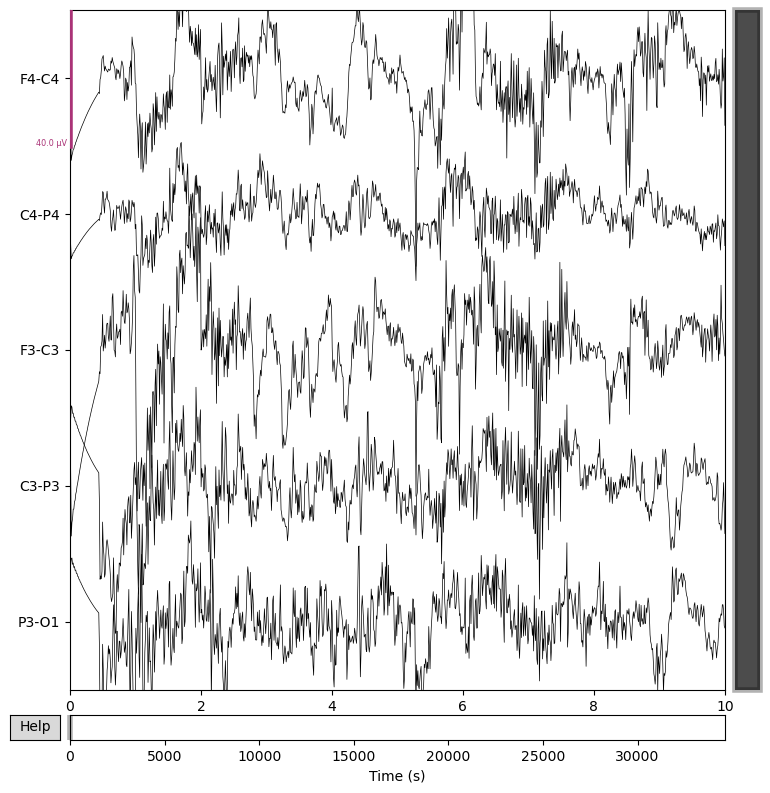

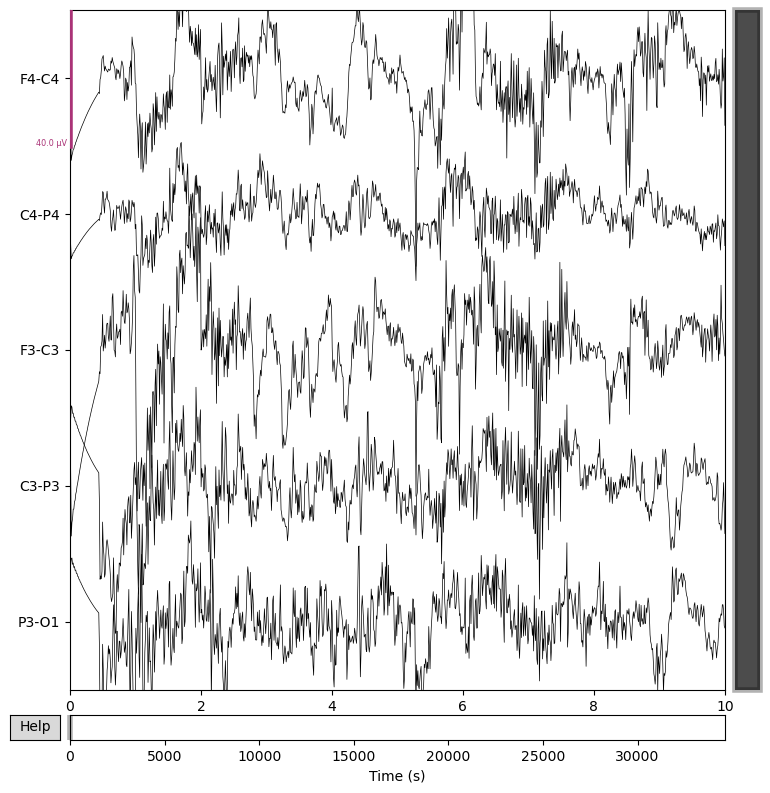

In [ ]:
dados_EEG.plot()

In [ ]:
canais = {
    'F4-C4': dados_EEG.get_data()[0],
    'F3-C3': dados_EEG.get_data()[1],
    'C3-P3': dados_EEG.get_data()[2],
    'P3-01': dados_EEG.get_data()[3]
}

print(canais.keys())


dict_keys(['F4-C4', 'F3-C3', 'C3-P3', 'P3-01'])


In [ ]:
# Obtenha todos os instantes de tempo e o sinal correspondente
tempo = dados_EEG.times
sinal = dados_EEG.get_data()

#cout(sum(tempo))
#cout(sinal)




## 2) Aplicando DFT

In [ ]:


# Determine quantos canais você tem
num_canais = len(canais)

# Determine o número de linhas e colunas para os subplots
# Aqui, estamos criando 2 colunas, mas você pode ajustar conforme necessário
num_linhas = num_canais // 2 + num_canais % 2
num_colunas = 2

# Crie a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(16, 8))

# Transforme axs em uma matriz unidimensional se for o caso
if num_canais == 1:
    axs = [axs]

# Itere pelos canais e crie subplots para cada um
for i, (canal, dados) in enumerate(canais.items()):
    linha = i // num_colunas
    coluna = i % num_colunas
    axs[linha][coluna].plot(dados, label=canal)
    axs[linha][coluna].set_title(canal)
    axs[linha][coluna].legend()

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Mostre os subplots
plt.show()


KeyboardInterrupt: 

In [ ]:

for canal in canais.keys():
    print('Canal = ',canal)
    plt.plot(canais[canal], label=canal)
    plt.legend()
    plt.show()


Canal =  F4-C4


In [ ]:
# Calcular a DFT
h, w = calcular_dft(dados_EEG)
cout(h)
cout(w)

# Obter o sinal no domínio do tempo
tempo = np.arange(len(dados_EEG.get_data()[0])) / dados_EEG.info['sfreq']
cout(tempo)

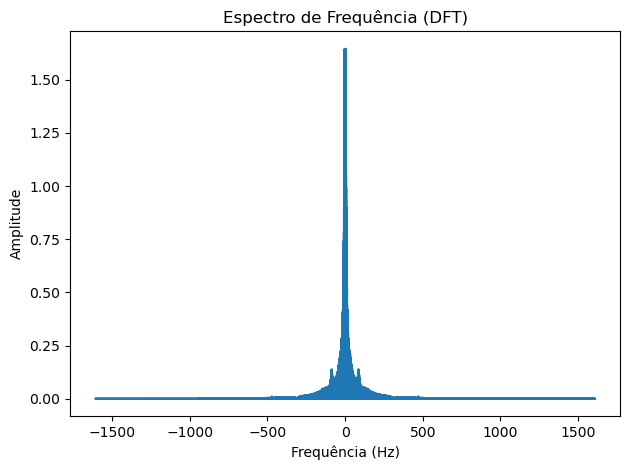

In [ ]:


# Plotar o espectro de frequência após a DFT
plt.plot(w, np.abs(h))
plt.title('Espectro de Frequência (DFT)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')



plt.tight_layout()
plt.show()

## 3) Filtragem

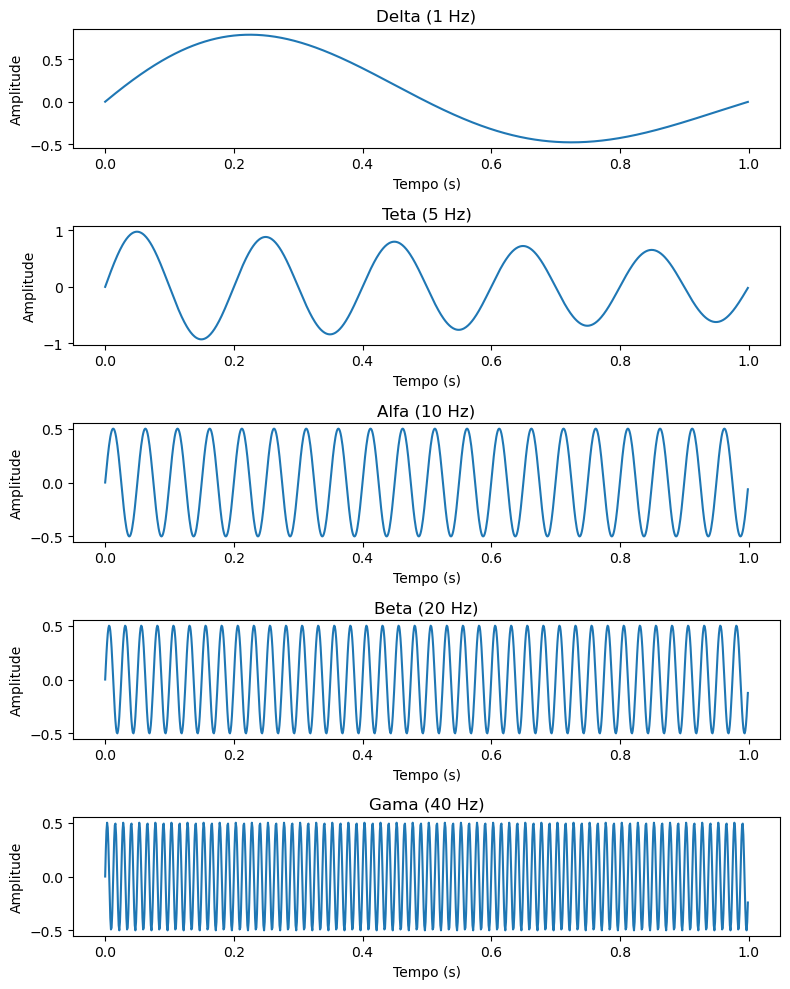

In [ ]:

# Função para gerar uma onda com frequência e nome específicos
def gerar_onda(frequencia, nome):
    tempo = np.linspace(0, 1, 1000, endpoint=False)  # Tempo de 0 a 1 segundo
    if nome == 'Delta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.exp(-tempo)
    elif nome == 'Teta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.exp(-tempo / 2)
    elif nome == 'Alfa':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 10 * tempo)
    elif nome == 'Beta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 20 * tempo)
    elif nome == 'Gama':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 40 * tempo)
    return tempo, onda

# Lista de frequências e nomes das ondas
frequencias = [1, 5, 10, 20, 40]
nomes = ['Delta', 'Teta', 'Alfa', 'Beta', 'Gama']

# Gerar e plotar as ondas
fig, axs = plt.subplots(5, figsize=(8, 10))
for i, (freq, nome) in enumerate(zip(frequencias, nomes)):
    tempo, onda = gerar_onda(freq, nome)
    axs[i].plot(tempo, onda)
    axs[i].set_title(f'{nome} ({freq} Hz)')
    axs[i].set_xlabel('Tempo (s)')
    axs[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
raw_filtered = raw.copy().filter(1,40, verbose=False);
raw_filtered.plot_psd();
raw_filtered.plot_psd(average=True);

NameError: name 'raw' is not defined

In [ ]:
filtrar_sinal(dados_EEG.load_data()[0],1,40)

Reading 0 ... 17725439  =      0.000 ... 34619.998 secs...


AttributeError: 'tuple' object has no attribute 'filter'

In [ ]:
def plotar_eeg_topomap(signal_array, save_path_animation=None, show_names=False, start_time=0.05, end_time=1, step_size=0.1):
    # select channel X,Y format
    montage = mne.channels.make_standard_montage('standard_1020')
    
    # remove channels that don't have X,Y positions
    ch_to_remove = []
    for ch in channel_list_fixed:
        if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
            ch_to_remove.append(channel_list_fixed.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)
    
    # create info+evoked objects
    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)
    
    # set channel X,Y positions
    evoked.set_montage(montage)

    # plot img
    evoked.plot_topomap(np.arange(start_time, end_time, step_size), ch_type='eeg', time_unit='s', ncols=5, nrows=2, show_names=show_names);


def get_signal_array(df, name, trial_number, matching_condition, channel_list):
    df_record = get_record_df(df, name, trial_number, matching_condition, channel_list)
    return df_record.to_numpy()[:, 4:]




plotar_eeg_topomap(dados_EEG, show_names=False)


NameError: name 'dados_EEG' is not defined

## 4) Analise Espectral

In [ ]:
# Exemplo de sinal (substitua pelo seu próprio sinal)
sfreq = 1000  # Frequência de amostragem em Hz
tempo = np.arange(0, 1000, 1/sfreq)  # Tempo de 0 a 1 segundo

# Chame a função para analisar o espectro
frequencias, espectro = analisar_espectro(dados_EEG, sfreq)

cout(frequencias)
cout(espectro)

try:
    # Plote o espectro de frequência
    plt.figure(figsize=(8, 4))
    plt.plot(frequencias, np.abs(espectro))
    plt.title('Espectro de Frequência')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
except:
    print('falhou')

ValueError: All picks must be < n_channels (5), got 5

## 5) Analise no dominio do tempo

## 6) Achando pontos de maximos e minimos

In [ ]:
picos = identificar_picos(dados_EEG)
plotar_sinal(picos,tempo,'Picos durante o tempo')



AttributeError: 'numpy.ndarray' object has no attribute 'get_data'

## 7) Encontrando a energia do Sinais

## 8) Criando um modelo de Arvore de Decisão para categorizar os pacientes

## 9) Analise Estatistica dos dados

## Prog funcional

In [ ]:
raw = mne.io.read_raw_edf(files, preload=True)
visualizar_dados_tempo(raw)
#visualizar_distribuicao_espacial(raw)
raw_filtrado = filtrar_sinal(raw, 8, 12)
frequencies, psd = calcular_densidade_espectral(raw_filtrado)
picos = identificar_picos(raw_filtrado)
h, w = calcular_dft(raw_filtrado)
niveis, energias = calcular_energia_wavelet(raw_filtrado.get_data()[0])
#print("Acurácia do modelo Random Forest:", treinar_random_forest(X, y))

Extracting EDF parameters from /home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/SEMESTRES/2023.2/Sinais e Sistemas/extensão/ATIVIDADE 03 - EXTENSÃO/dataset sleep EEG/n1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17725439  =      0.000 ... 34619.998 secs...
